In [1]:
def subsample_labels(df, labels):
    return df.loc[df['label'].isin(labels)]

def subsample_features(df):
    features = []
    for f in df.columns.tolist():
        if 'e0' in f or 'e2' in f:
            continue
        features.append(f)
    df.drop(features, axis=1, inplace=True)
    return df

In [7]:
import pandas as pd
df = pd.read_csv('results/feature_vector.csv', index_col=0)


# df = df[df['group'] != 'none_hearing']
# label_names = ['angry','fear','happy', 'neutral', 'sad']
# df = subsample_labels(df, label_names)

# labels = df['label']
group = df['group']
df.drop(['label', 'group'], axis=1, inplace=True)
# df = subsample_features(df)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf = RandomForestClassifier(criterion='entropy')
# cv_scores = cross_val_score(clf, df, labels, cv=10)
cv_scores = cross_val_score(clf, df, group, cv=10)

print(cv_scores)
print(np.mean(cv_scores))

[1.  0.8 0.9 1.  1.  1.  1.  1.  1.  1. ]
0.97


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


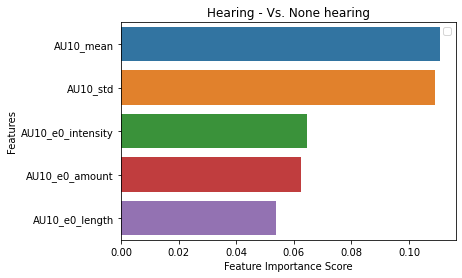

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


clf.fit(df, group)
feature_imp = pd.Series(clf.feature_importances_,index=df.columns.tolist()).sort_values(ascending=False)
feature_imp = feature_imp[0:5]


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Hearing - Vs. None hearing")
plt.legend()
plt.show()

[Text(0.5454545454545454, 0.9166666666666666, 'AU07_mean <= 0.669\ngini = 0.8\nsamples = 50\nvalue = [10, 10, 10, 10, 10]\nclass = angry'),
 Text(0.45454545454545453, 0.75, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0, 0]\nclass = fear'),
 Text(0.6363636363636364, 0.75, 'AU04_mean <= 0.308\ngini = 0.761\nsamples = 41\nvalue = [10, 1, 10, 10, 10]\nclass = angry'),
 Text(0.45454545454545453, 0.5833333333333334, 'AU12_mean <= 0.641\ngini = 0.583\nsamples = 22\nvalue = [0, 1, 10, 10, 1]\nclass = happy'),
 Text(0.36363636363636365, 0.4166666666666667, 'AU06_e0_amount <= 1.5\ngini = 0.391\nsamples = 13\nvalue = [0, 1, 1, 10, 1]\nclass = neutral'),
 Text(0.18181818181818182, 0.25, 'AU07_e1_length <= 2.5\ngini = 0.165\nsamples = 11\nvalue = [0, 0, 1, 10, 0]\nclass = neutral'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = happy'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]\ncla

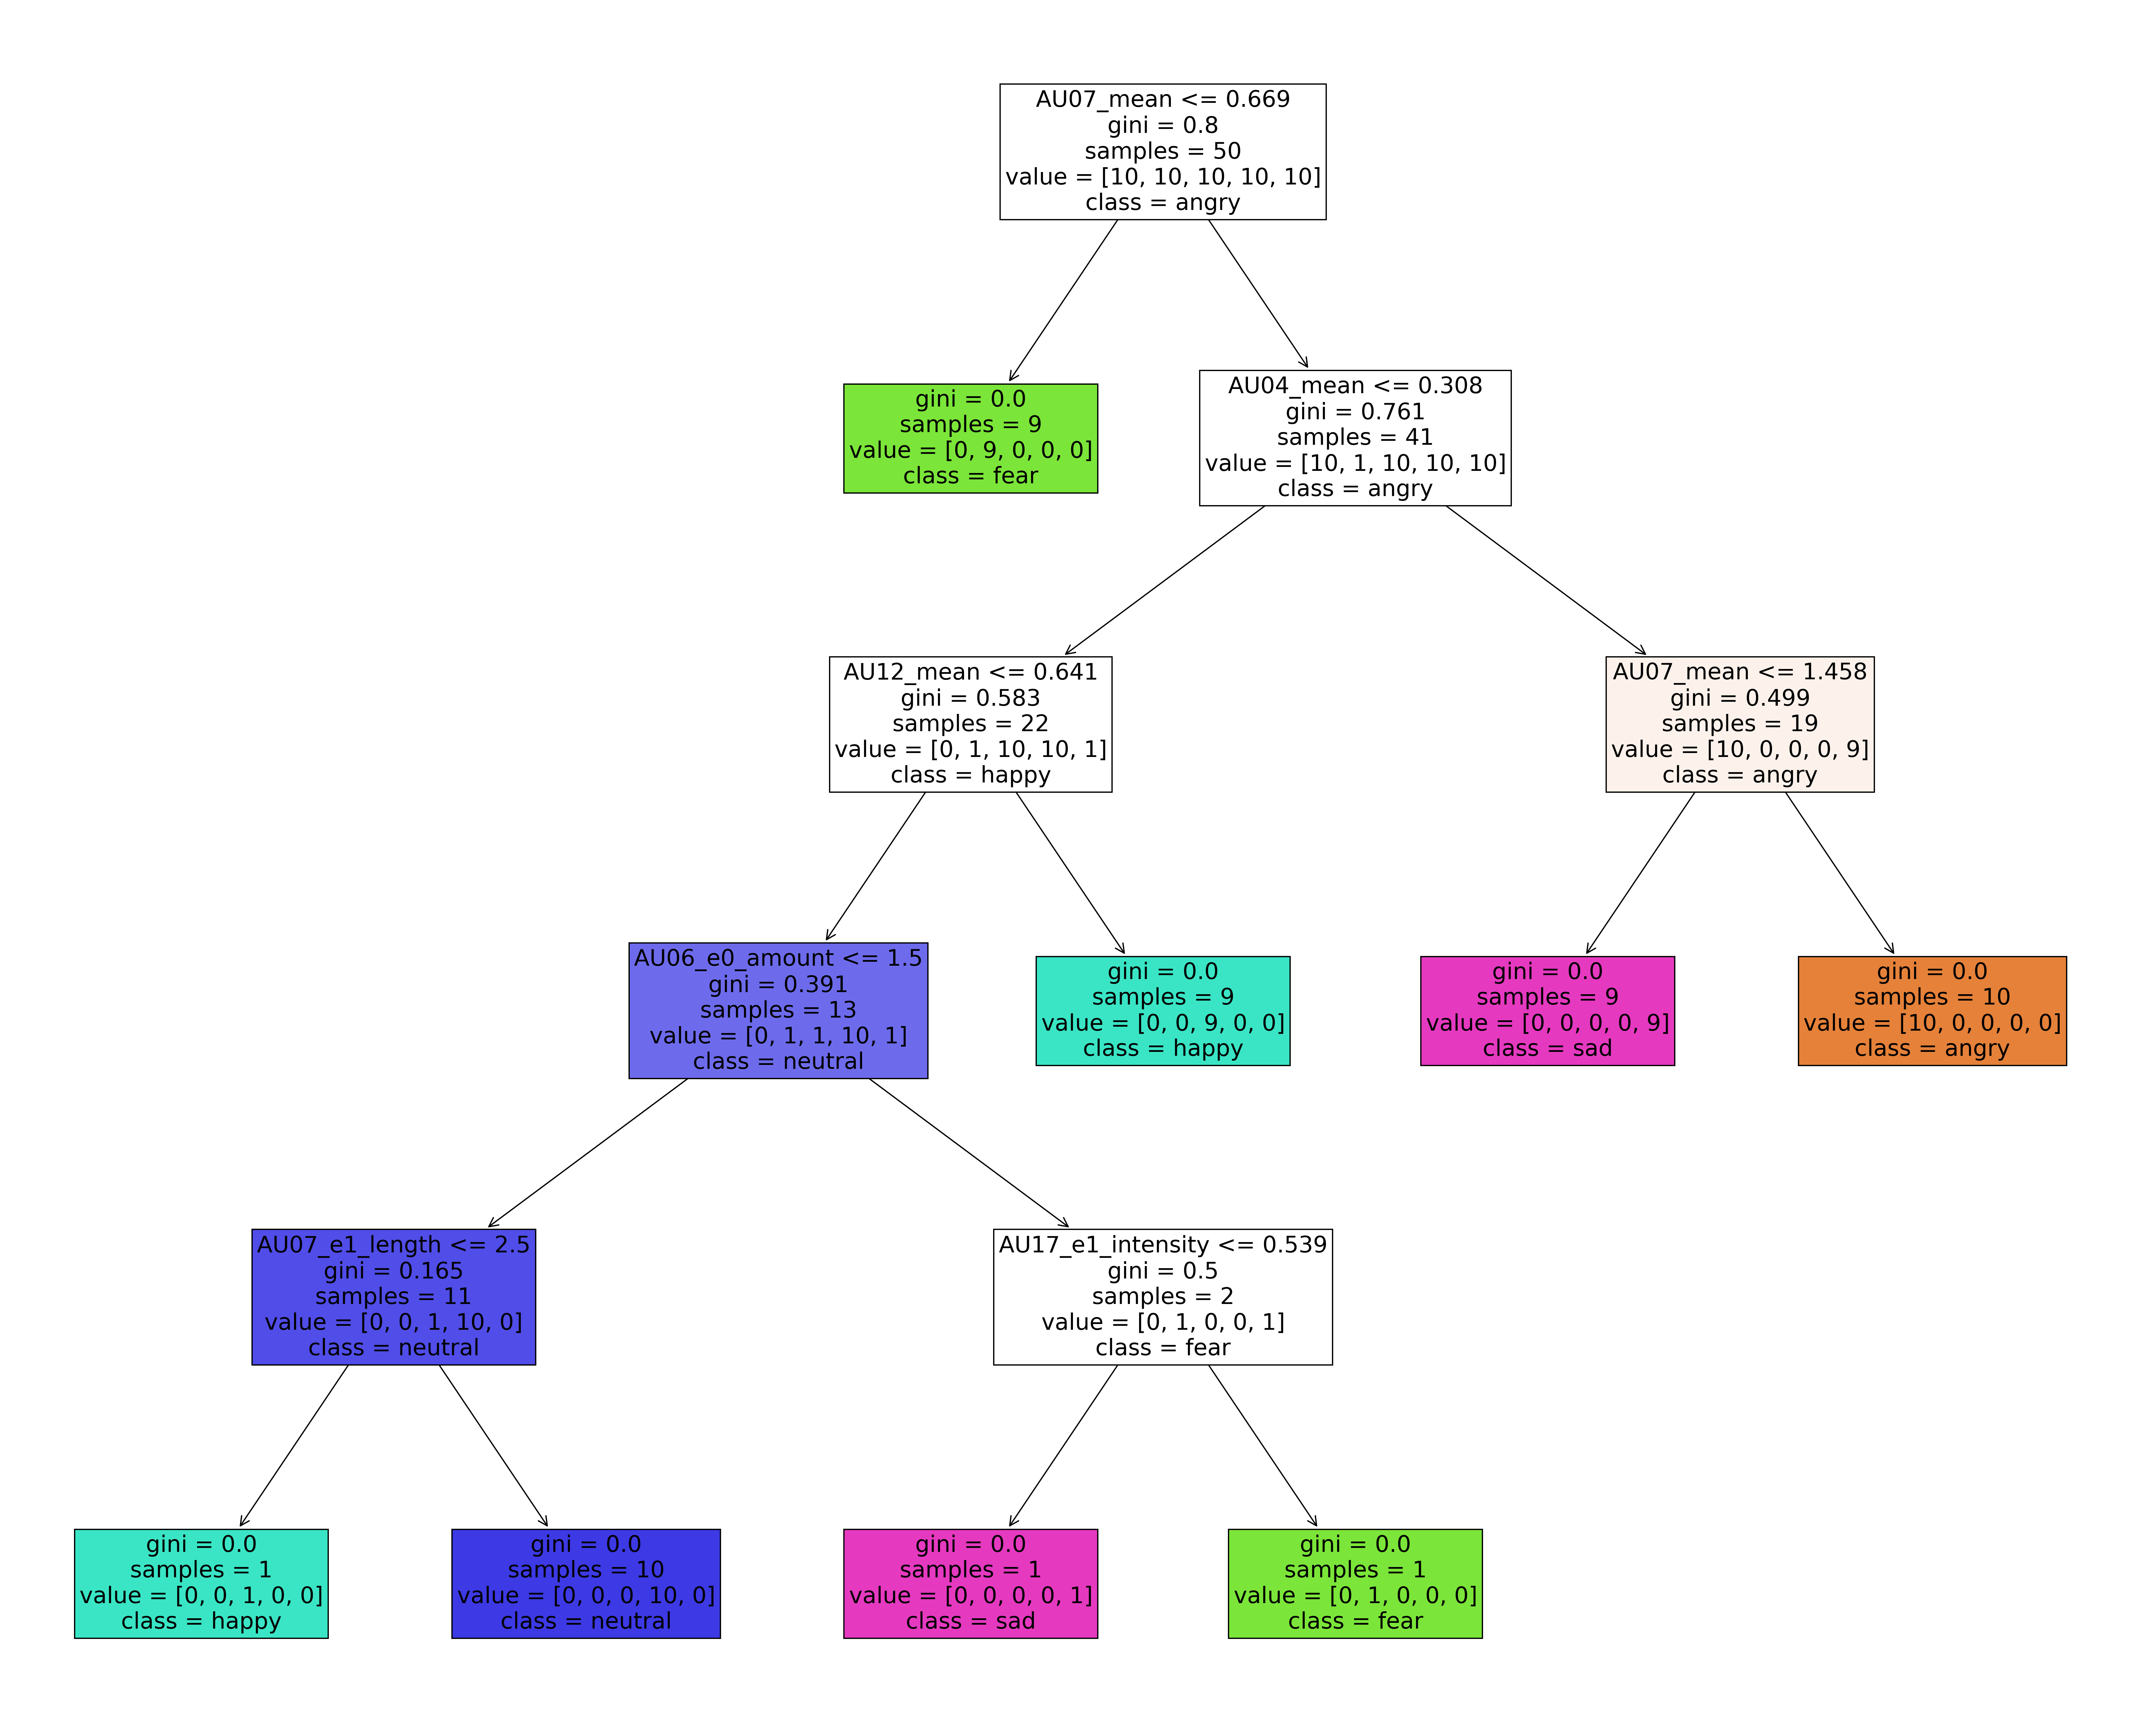

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
clf.fit(df, labels)
clf = clf.base_estimator_
clf.fit(df, labels)


fig = plt.figure(figsize=(30,25), dpi=300)
tree.plot_tree(clf, filled=True, fontsize = 18, feature_names = df.columns.tolist(), class_names=label_names)
# plt.savefig('out.jpeg')
